# **Project CAD Group 19 | Main Results File**

#### 0: Initialization

In [1]:
## Imports
%matplotlib inline
import sys
sys.path.append("../code")
import numpy as np
import cad_project
import scipy.io
from cad_project import nuclei_classification

c:\Users\quint\miniconda3\envs\8dc00\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 1: Logistical Regression

#### 1.1: Without PCA

Testing mu=0.0004898, batch_size=57


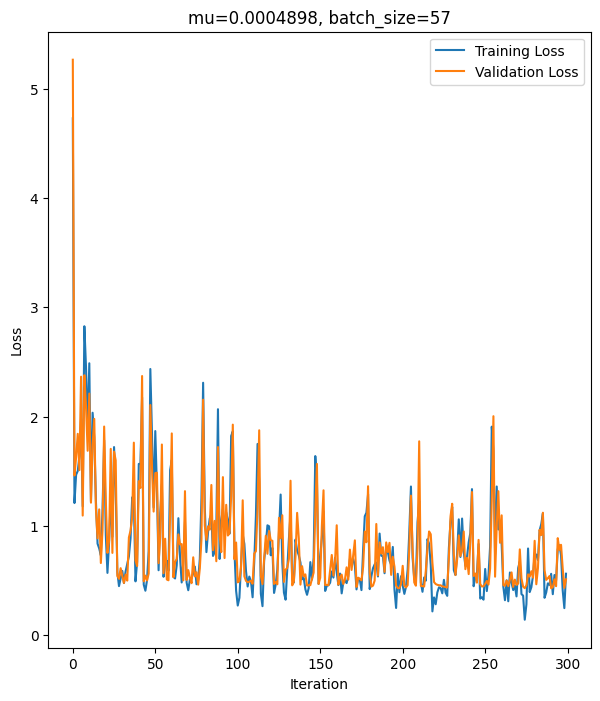

Best hyperparameters: mu=0.0004898, batch_size=57, Theta=[[-0.007598  ]
 [-0.02636708]
 [ 0.00268275]
 ...
 [-0.02123515]
 [-0.01328612]
 [ 0.007651  ]]
Best validation loss: 0.5105863705103445


array([[-0.007598  ],
       [-0.02636708],
       [ 0.00268275],
       ...,
       [-0.02123515],
       [-0.01328612],
       [ 0.007651  ]])

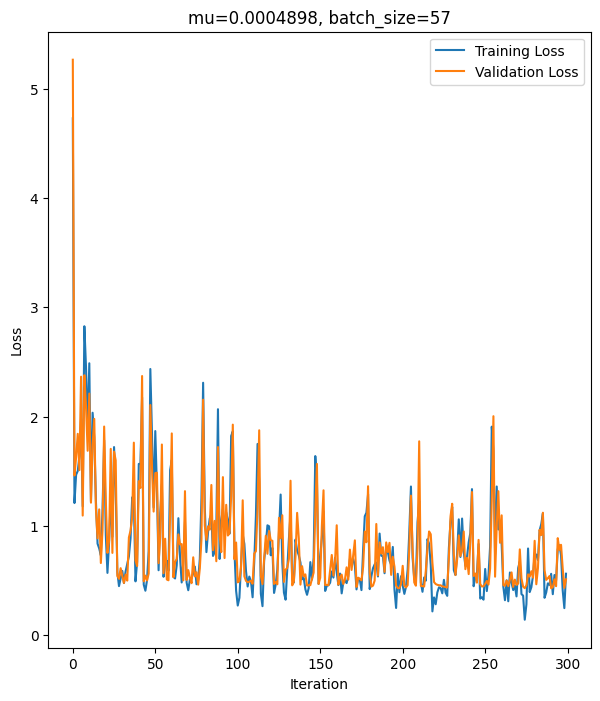

In [2]:
## Finding good parameters using a random search with 100 trials using 30 iterations. 
# This takes aprox. 5 mins. Should be skipped if it has already ran once.
skip_param_search = True
best_params = nuclei_classification(use_PCA=False,plot=False) if not skip_param_search else None

# Running the model with previously found parameters after 100 random search iterations
# with search validation loss : ca. 2.944,
# full validation loss (epoch 100): ca. 0.511:
if best_params == None:
    mu = mu=0.0004898
    batch_size=57
else:
    mu,batch_size = best_params

# Run model with 300 iterations
nuclei_classification(use_PCA=False,plot=True,static_params=[mu,batch_size])

#### 1.2: With PCA

95.0% explained using 133 components.
Testing mu=0.0001114, batch_size=158


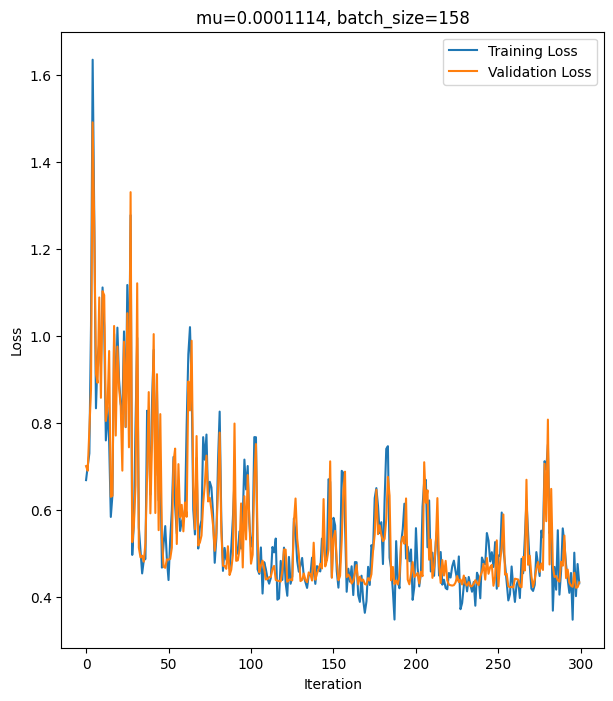

Best hyperparameters: mu=0.0001114, batch_size=158, Theta=[[ 0.01456288]
 [ 0.00519994]
 [ 0.00096305]
 [ 0.00208386]
 [ 0.01624073]
 [-0.00468209]
 [ 0.0081877 ]
 [ 0.21237713]
 [ 0.04100444]
 [-0.01587913]
 [-0.10596575]
 [ 0.029708  ]
 [-0.02470948]
 [-0.20857993]
 [ 0.00272084]
 [-0.00614704]
 [-0.30918237]
 [ 0.01838162]
 [-0.01187016]
 [-0.00373159]
 [ 0.01095111]
 [ 0.01053805]
 [ 0.01640368]
 [ 0.07758993]
 [-0.33387741]
 [ 0.03093541]
 [ 0.00347313]
 [ 0.0774169 ]
 [-0.0020522 ]
 [ 0.01916641]
 [-0.01757597]
 [ 0.01770603]
 [ 0.01363451]
 [-0.02465444]
 [-0.05443635]
 [-0.00700997]
 [ 0.0233967 ]
 [-0.03211809]
 [ 0.00265874]
 [ 0.03919157]
 [-0.00540021]
 [-0.02446762]
 [-0.03913067]
 [-0.06331752]
 [-0.02293794]
 [ 0.01290958]
 [-0.01042612]
 [ 0.02485397]
 [-0.05084551]
 [-0.02173947]
 [ 0.04139338]
 [-0.05694167]
 [ 0.00732988]
 [ 0.01590782]
 [-0.03131097]
 [ 0.05426933]
 [-0.27309583]
 [ 0.01123581]
 [-0.02626481]
 [ 0.02628003]
 [-0.02198458]
 [ 0.04967097]
 [-0.1355862

array([[ 0.01456288],
       [ 0.00519994],
       [ 0.00096305],
       [ 0.00208386],
       [ 0.01624073],
       [-0.00468209],
       [ 0.0081877 ],
       [ 0.21237713],
       [ 0.04100444],
       [-0.01587913],
       [-0.10596575],
       [ 0.029708  ],
       [-0.02470948],
       [-0.20857993],
       [ 0.00272084],
       [-0.00614704],
       [-0.30918237],
       [ 0.01838162],
       [-0.01187016],
       [-0.00373159],
       [ 0.01095111],
       [ 0.01053805],
       [ 0.01640368],
       [ 0.07758993],
       [-0.33387741],
       [ 0.03093541],
       [ 0.00347313],
       [ 0.0774169 ],
       [-0.0020522 ],
       [ 0.01916641],
       [-0.01757597],
       [ 0.01770603],
       [ 0.01363451],
       [-0.02465444],
       [-0.05443635],
       [-0.00700997],
       [ 0.0233967 ],
       [-0.03211809],
       [ 0.00265874],
       [ 0.03919157],
       [-0.00540021],
       [-0.02446762],
       [-0.03913067],
       [-0.06331752],
       [-0.02293794],
       [ 0

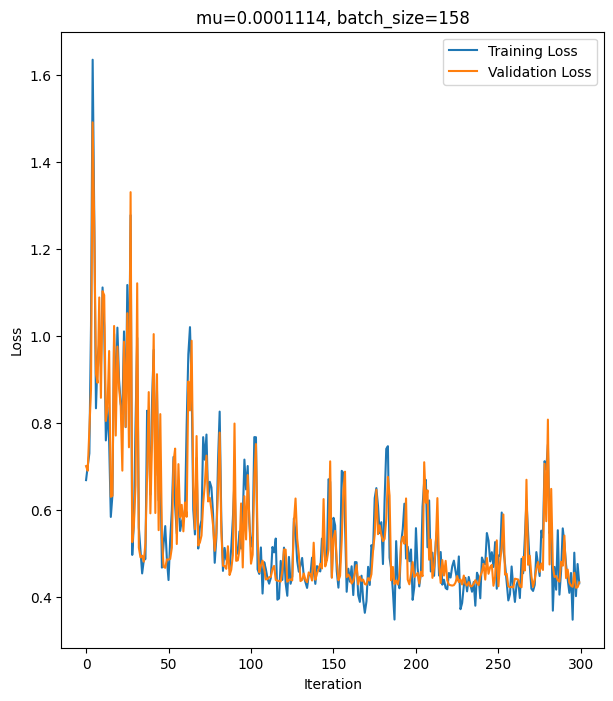

In [7]:
## Finding good parameters using a random search with 100 trials using 30 iterations. 
# This takes aprox. 5 mins. Should be skipped if it has already ran once.
skip_param_search = True
best_params = nuclei_classification(use_PCA=True,plot=False) if not skip_param_search else None

# Running the model with previously found parameters after 100 random search iterations
# with search validation loss : ca. 0.523,
# full validation loss (epoch 100): ca. 0.433:
if best_params == None:
    mu=0.0001114
    batch_size=158
else:
    mu,batch_size = best_params

# Run model
nuclei_classification(use_PCA=True,plot=True,static_params=[mu,batch_size])


# 3: Convolutional Neural Network

#### 3.1: Without PCA

In [2]:
# getting good parameters using random search with 100 iterations.
# This takes approx. 45m to run. This search should be skipped if it has already been run once.
skip_param_search = True

if not skip_param_search:
    ## dataset preparation (standard)
    nuclei_class_nn_param = cad_project.Training()
    nuclei_class_nn_param.data_preprocessing()

    ## define starting parameters using a randomized search using 10 epochs
    # chosen ranges to search: learning_rate = [0.001, 0.05], batch_size = [128, 512], hidden_features = [500, 2000]
    best_params_param = nuclei_class_nn_param.get_hyperparameters(n_trials=100)

# previously found best parameters using above code,
# with search validation accuracy (epoch 10): ca. 0.793,
# full validation accuracy (epoch 100): ca. 0.807:
learning_rate = 0.0204
batch_size = 465 
hidden_features = 1526

nuclei_class_nn = cad_project.Training()
nuclei_class_nn.data_preprocessing()
#nuclei_class_nn.define_shapes(0.005, 256, 1000)
nuclei_class_nn.define_shapes(learning_rate,batch_size,hidden_features)

# start training
nuclei_class_nn.launch_training(100,True)

# Results of NN training
nuclei_class_nn.pass_on_test_set()

> Start random hyperparametric search ...
Testing lr=0.04238, batch=343, hidden_features=582
> Start training ...
> Training finished with accuracy = 0.7865260851704778
(Trial 1/30 finished)
Testing lr=0.01428, batch=429, hidden_features=1497
> Start training ...
> Training finished with accuracy = 0.7917294262631795
(Trial 2/30 finished)
Testing lr=0.01632, batch=195, hidden_features=1571
> Start training ...
> Training finished with accuracy = 0.7894016157743393
(Trial 3/30 finished)
Testing lr=0.03709, batch=422, hidden_features=1187
> Start training ...
> Training finished with accuracy = 0.7618786799945227
(Trial 4/30 finished)
Testing lr=0.01788, batch=244, hidden_features=692
> Start training ...
> Training finished with accuracy = 0.7754347528412981
(Trial 5/30 finished)
Testing lr=0.01667, batch=223, hidden_features=1810
> Start training ...
> Training finished with accuracy = 0.7596877995344379
(Trial 6/30 finished)
Testing lr=0.01112, batch=480, hidden_features=901
> Start t

#### 3.2 with PCA-fitted dataset

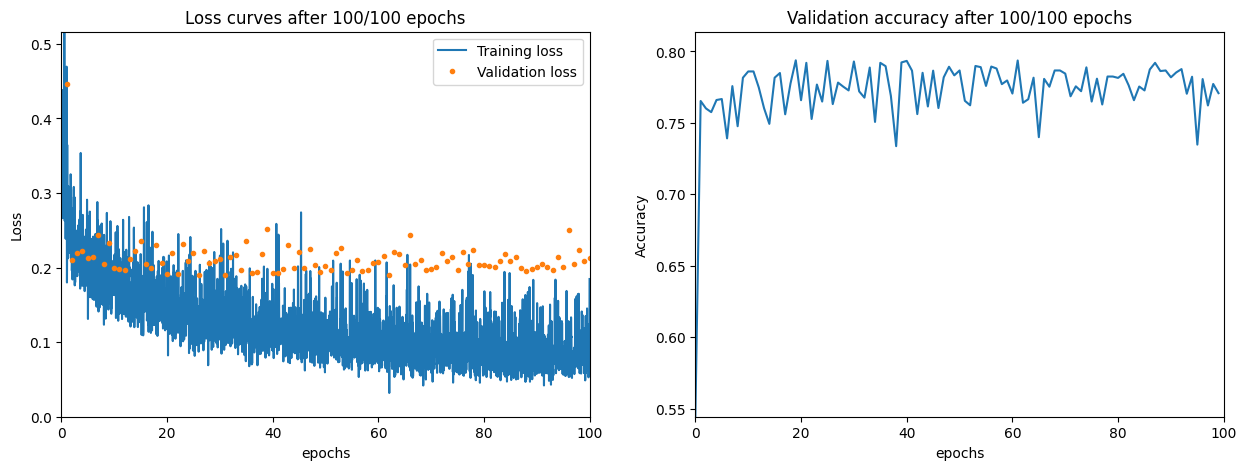

> Training finished with accuracy = 0.7707791318636177
Test accuracy: 0.79


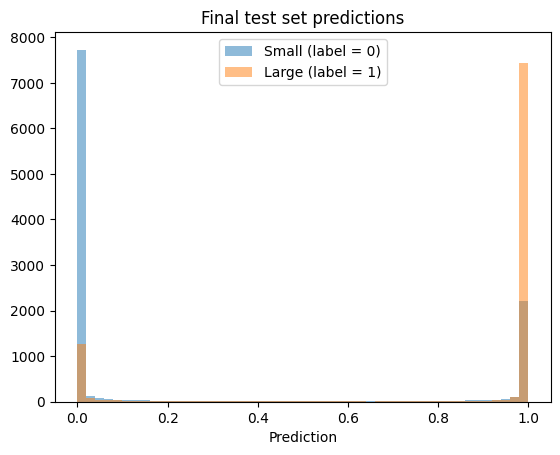

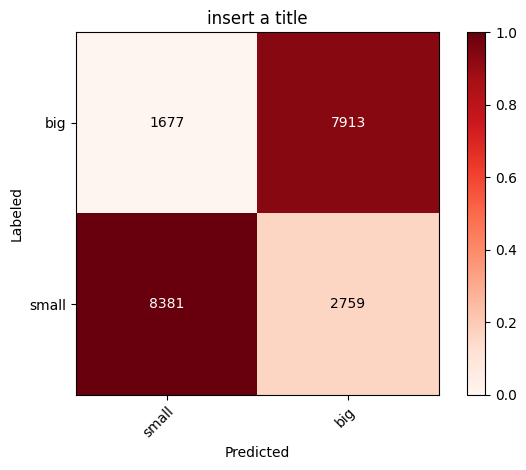

0.7860106126386879

In [6]:
# getting good parameters using random search with 100 iterations.
# This takes approx. 45m to run. This search should be skipped if it has already been run once.
skip_param_search = True

if not skip_param_search:
    ## dataset preparation (standard) but now with PCA:
    nuclei_class_nn_param = cad_project.Training()
    nuclei_class_nn_param.data_preprocessing_PCA() # PCA!

    ## define starting parameters using a randomized search using 10 epochs
    # chosen ranges to search: learning_rate = [0.001, 0.05], batch_size = [128, 512], hidden_features = [500, 2000]
    best_params_param  = nuclei_class_nn_param.get_hyperparameters(n_trials=100)

# previously found best parameters using above code,
# with search validation accuracy (epoch 10): ca. 0.796,
# full validation accuracy (epoch 100): ca. 0.781:
learning_rate = 0.020414941624687665
batch_size = 363
hidden_features = 707

nuclei_class_nn = cad_project.Training()
nuclei_class_nn.data_preprocessing_PCA()
#nuclei_class_nn.define_shapes(0.005, 256, 1000)
nuclei_class_nn.define_shapes(learning_rate,batch_size,hidden_features)

# start training
nuclei_class_nn.launch_training(100,True)

# Results of NN training
nuclei_class_nn.pass_on_test_set()

# Something of note:
Throughout training of the model, validation and training loss values start to differ greatly (reaching ca. >0.1) signaling an overfit to the training data. While this can be symptomatic of a variety of issues, a common and logiscal explanation would be that the training data has not been prepaired properly. Best plan of action: remove outliers from the dataset.

In [ ]:
# Statistical analysis : still only pasted from the registration project
### Statistical analysis ###
# input: list of computation times per formula: rigid_cc_time, affine_cc_time, affine_mi_time --> no processing is done with this, these are nice-to-haves
# input: list of computation times per type of registration: time_rigid, time_affine, time_rigid_all, time_affine_all
# input: list of affine transformation matrices per registration: transformations (rot, scalex, scaley, shearx, sheary, translatex, translatey)

# output: significance testing between the types of registration
# output: power analysis of significance testing
# output: Boxplots for the computation time data spread

aggr_rigid_affine = [time_rigid[i]+time_affine[i] for i in range(len(time_rigid))] # List containing all tests, containing the time using our chosen method
data = np.hstack((time_rigid, time_affine, aggr_rigid_affine, time_rigid_all, time_affine_all))
df_time = pd.DataFrame({'T_rigid': time_rigid,
                        'T_affine': time_affine,
                        'T_aggr_all': aggr_rigid_affine,
                        'T_rigid_all': time_rigid_all,
                        'T_affine_all': time_affine_all})
box = df_time.boxplot(grid=True)
box.plot(figsize=(1,3), title="Boxplot of computation time of rigid and affine transformation registration")

# Test for equal variance
print("Variance of comp. time for all rigid transformations: ",np.var(a=df_time['T_rigid_all']))
print("Variance of comp. time for all affine transformations: ",np.var(a=df_time['T_affine_all']))
print("Variance of comp. time for the chosen transformations: ",np.var(a=df_time['T_aggr_all']))
     

# Variance vary less than factor 4:
    # Test if the computation time to use affine transformation compared to rigid transformation is longer
print("t test affine_all>rigid_all: ",stats.ttest_ind(a=df_time['T_affine_all'],b=df_time['T_rigid_all'], equal_var=False,alternative='greater')) 

    # Test if the aggregated computation time is shorter than all affine registration  
print("t test affine_all>aggr: ",stats.ttest_ind(a=df_time['T_affine_all'],b=df_time['T_aggr_all'], equal_var=False,alternative='greater'))


In [ ]:
# See if our decision program is working well
rigid_decision = np.array([True if time_rigid[i]>0 else False for i in range(len(time_rigid))]) # Records if rigid was chosen

data2 = [rigid_decision]
sum_affine = [transformations[i][1]+transformations[i][2]+transformations[i][3]+transformations[i][4] for i in range(len(transformations))]
# sum_affine = np.sum(np.array(sum_affine))
print(sum_affine)

df_transform = pd.DataFrame({"Decision": rigid_decision,
                             "Sum_affine": sum_affine})
box2 = df_transform.plot.box(column="Sum_affine",by="Decision",figsize=(5,5)) # Boxplot that sums the affine parameters and groups them by our decision

# Basic statistics of the average shear and scaling present 
    # Scaling
print("Mean of all scaling: ",np.mean(np.array(transformations).reshape(len(transformations),7)[:,1:3]))
print("Mean of scaling of rigid: ", np.mean(np.array(transformations).reshape(len(transformations),7)[rigid_decision,1:3]))
print("Mean of scaling of affine: ", np.mean(np.array(transformations).reshape(len(transformations),7)[~rigid_decision,1:3]))

print("Variance of all scaling: ",np.var(np.array(transformations).reshape(len(transformations),7)[:,1:3]))
print("Variance of scaling of rigid: ", np.var(np.array(transformations).reshape(len(transformations),7)[rigid_decision,1:3]))
print("Variance of scaling of affine: ", np.var(np.array(transformations).reshape(len(transformations),7)[~rigid_decision,1:3]))

    #Shear
print("Mean of all shear: ",np.mean(np.array(transformations).reshape(len(transformations),7)[:,3:5]))
print("Mean of shear of rigid: ", np.mean(np.array(transformations).reshape(len(transformations),7)[rigid_decision,3:5]))
print("Mean of shear of affine: ", np.mean(np.array(transformations).reshape(len(transformations),7)[~rigid_decision,3:5]))

print("Variance of all shear: ",np.var(np.array(transformations).reshape(len(transformations),7)[:,3:5]))
print("Variance of shear of rigid: ", np.var(np.array(transformations).reshape(len(transformations),7)[rigid_decision,3:5]))
print("Variance of shear of affine: ", np.var(np.array(transformations).reshape(len(transformations),7)[~rigid_decision,3:5]))
print((time_rigid))